In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from visual import *
from plot3D import *

In [4]:
patients = sorted(os.listdir('./input/sample_images/'))

Inspired by Guido Zuidhof

In [5]:
img = getImages(patients[1])[70]

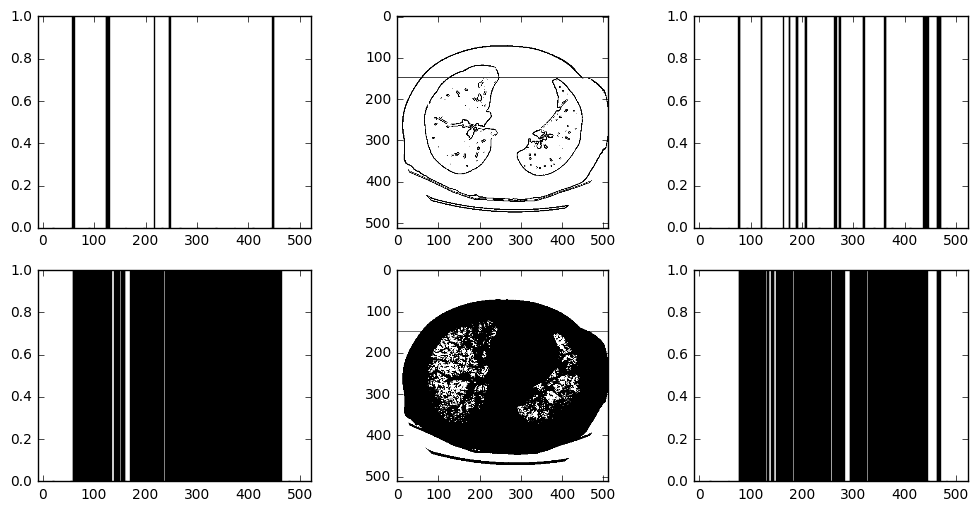

In [6]:
cutHist(img,150,200)

In [7]:
pic = clearFrame(img,-1200,-800)

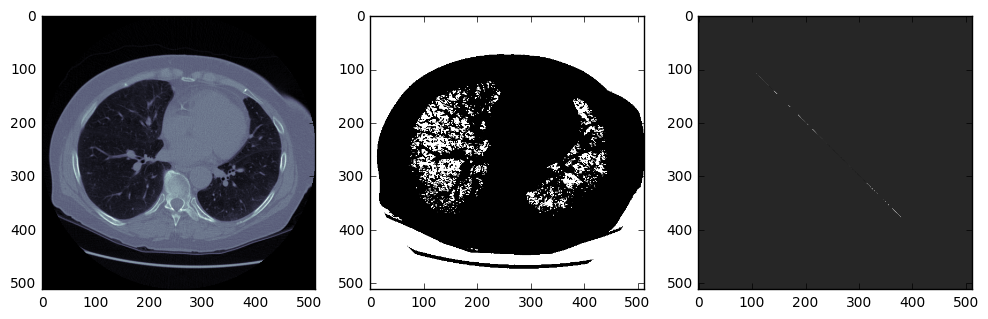

In [8]:
plt.figure(figsize(12,6))
plt.subplot(1,3,1)
plt.imshow(img,cmap=plt.cm.bone)
plt.subplot(1,3,2)
plt.imshow(getLaplacianImage(img),cmap="Greys")
plt.subplot(1,3,3)
plt.imshow(img*pic,cmap="Greys")